# **PLOT OF SIN FUNCTION**

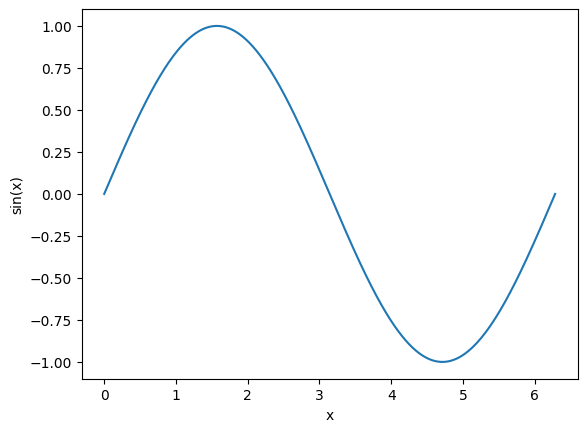

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x_smooth = np.linspace(0, 2 * np.pi, 1000)
y_smooth = np.sin(x_smooth)


plt.plot(x_smooth, y_smooth)


plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()


# **GENERATING 5 FOLDS AND PLOT OF TRAINING DATA**

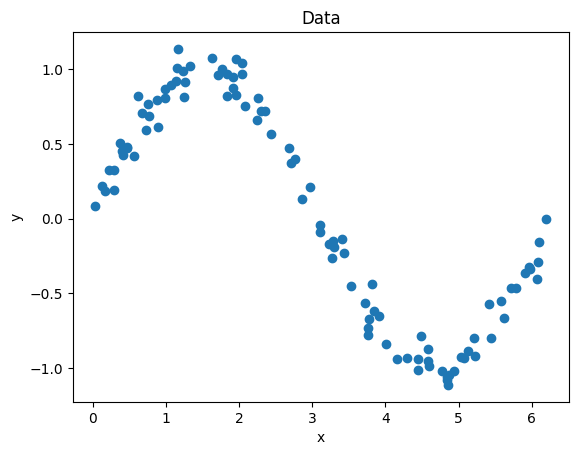

In [ ]:
import numpy as np

# Generate synthetic data
np.random.seed(42)
x = np.random.uniform(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Scatter plot of the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()

# Shuffle indices
indices = np.arange(len(x))
np.random.shuffle(indices)

# Number of folds
k = 5
fold_size = len(x) // k

# Split data into 5 folds
folds_x = []
folds_y = []

for i in range(k):
    j = indices[i * fold_size: (i + 1) * fold_size]
    folds_x.append(x[j])
    folds_y.append(y[j])


In [ ]:
def k_fold_cross_validation(folds_x,folds_y,deg):
  # Perform 5-fold cross-validation
  errors = []

  for i in range(5):
      # Test on the i-th fold
      x_test, y_test = folds_x[i], folds_y[i]

      # Train on the remaining folds
      x_train = np.concatenate([folds_x[j] for j in range(k) if j != i])
      y_train = np.concatenate([folds_y[j] for j in range(k) if j != i])

      # Fit a D degree polynomial
      p = np.polyfit(x_train, y_train, deg)
      f = np.poly1d(p)

      # Predict on the test set
      y_pred = f(x_test)

      # Compute Mean Squared Error (MSE)
      mse = np.mean((y_test - y_pred) ** 2)
      errors.append(mse)

      print(f"Fold {i+1} MSE: {mse:.5f}")

  # Print the average MSE
  print("Average MSE across 5 folds:", np.mean(errors))

  print()
  return np.mean(errors)

In [ ]:
avg_of_mse_of_k_fold_cross_validation = []
avg_of_mse_of_k_fold_cross_validation.append(k_fold_cross_validation(folds_x,folds_y,1))
avg_of_mse_of_k_fold_cross_validation.append(k_fold_cross_validation(folds_x,folds_y,2))
avg_of_mse_of_k_fold_cross_validation.append(k_fold_cross_validation(folds_x,folds_y,3))
avg_of_mse_of_k_fold_cross_validation.append(k_fold_cross_validation(folds_x,folds_y,4))

Fold 1 MSE: 0.23398
Fold 2 MSE: 0.23303
Fold 3 MSE: 0.20984
Fold 4 MSE: 0.22366
Fold 5 MSE: 0.15669
Average MSE across 5 folds: 0.21143917608469293

Fold 1 MSE: 0.23406
Fold 2 MSE: 0.24882
Fold 3 MSE: 0.21134
Fold 4 MSE: 0.23097
Fold 5 MSE: 0.15719
Average MSE across 5 folds: 0.2164770768662724

Fold 1 MSE: 0.01530
Fold 2 MSE: 0.00839
Fold 3 MSE: 0.01302
Fold 4 MSE: 0.01608
Fold 5 MSE: 0.01223
Average MSE across 5 folds: 0.01300277702176282

Fold 1 MSE: 0.01525
Fold 2 MSE: 0.00844
Fold 3 MSE: 0.01297
Fold 4 MSE: 0.01728
Fold 5 MSE: 0.01245
Average MSE across 5 folds: 0.013277626444217844



In [ ]:
deg_of_pol=0
mse=float('inf')

for l in range(len(avg_of_mse_of_k_fold_cross_validation)):
  if(mse > (avg_of_mse_of_k_fold_cross_validation[l])):
    mse=avg_of_mse_of_k_fold_cross_validation[l]
    deg_of_pol=l+1
print(f"Deg of polynomial",{deg_of_pol})

Deg of polynomial {3}


# **So the best fit model is of deg 3**

# **REFITTING THE MODEL**

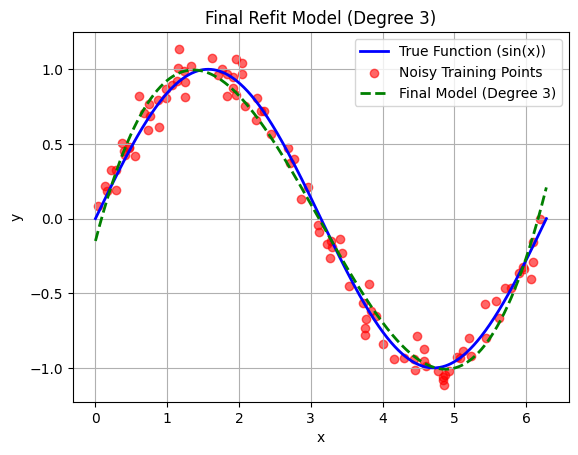

In [ ]:
# Refit the model using the entire dataset
p_final = np.polyfit(x, y, 3)
f_final = np.poly1d(p_final)  # Final polynomial function

# Generate smooth x values for plotting
x_smooth = np.linspace(0, 2 * np.pi, 1000)
y_true = np.sin(x_smooth)  # True function
y_pred_final = f_final(x_smooth)  # Final model's prediction

# Plot the true function
plt.plot(x_smooth, y_true, label="True Function (sin(x))", color="blue", linewidth=2)

# Plot the noisy training points
plt.scatter(x, y, label="Noisy Training Points", color="red", alpha=0.6)

# Plot the final regression model's prediction
plt.plot(x_smooth, y_pred_final, label=f"Final Model (Degree {3})", color="green", linestyle="dashed", linewidth=2)

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Final Refit Model (Degree {3})")

# Show legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
